# 作业03

## 背景估计

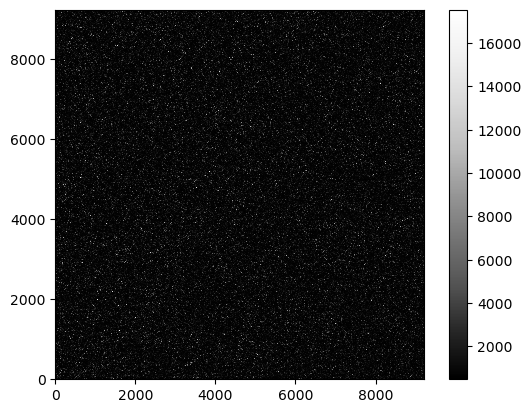

In [15]:
from astropy.io import fits
from matplotlib import pyplot as plt
from photutils.background import Background2D, MedianBackground
import numpy as np
data = fits.getdata(r'F:\data\image\CSST_MSC_MS_SCI_20210525120000_20210525120230_100000000_08_L0_1 2.fits')
bkg_estimator = MedianBackground()
bkg = Background2D(data, (5, 5), filter_size=(3, 3), bkg_estimator=bkg_estimator)
plt.imshow(bkg.background, origin='lower', cmap='Greys_r', interpolation='nearest')
plt.colorbar()
# plt.show()

(-15090.385812289129, 65055.0)

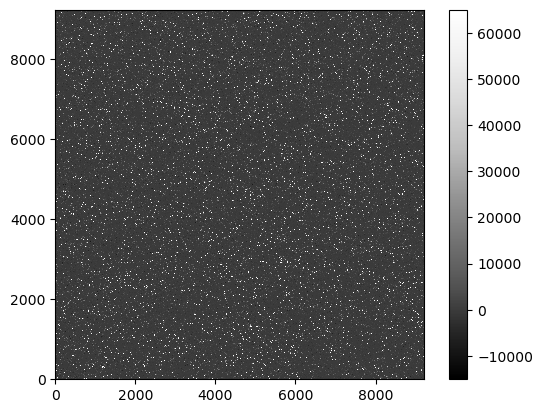

In [14]:
plt.imshow(data - bkg.background, origin='lower', cmap='Greys_r', interpolation='nearest')
plt.colorbar()
objmap = data - bkg.background
objmap.min(), objmap.max()
# plt.show()

**评价：我去！为什么会有负的！**

图像中值和双权位置以及中值绝对偏差

In [16]:
import numpy as np
from astropy.stats import biweight_location, mad_std
print(np.median(data))
print(biweight_location(data))
print(mad_std(data))

775.0
762.713784224812
268.35100154951397


mask操作

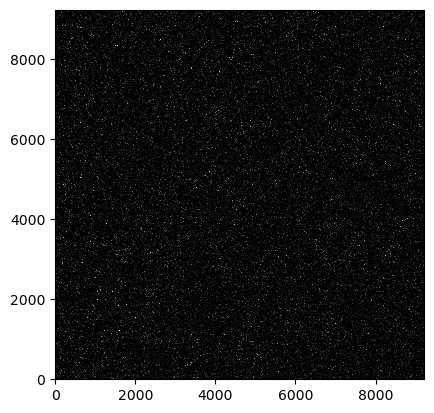

In [17]:
from astropy.stats import SigmaClip
sigma_clip = SigmaClip(sigma=3.0)
bkg1 = Background2D(data, (5, 5), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
plt.imshow(bkg1.background, origin='lower', cmap='Greys_r', interpolation='nearest')
plt.colorbar()
# plt.show()

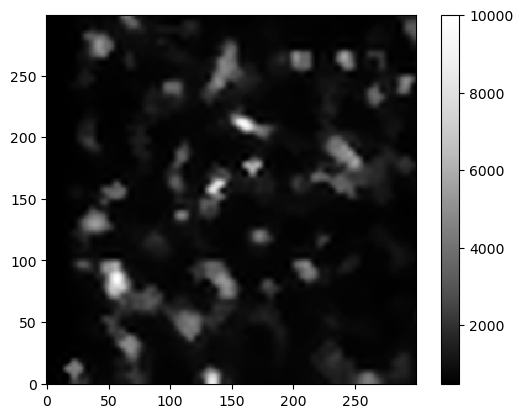

In [20]:
plt.imshow(bkg1.background[0:300,0:300], origin='lower', cmap='Greys_r', interpolation='nearest')
plt.colorbar()
# plt.show()

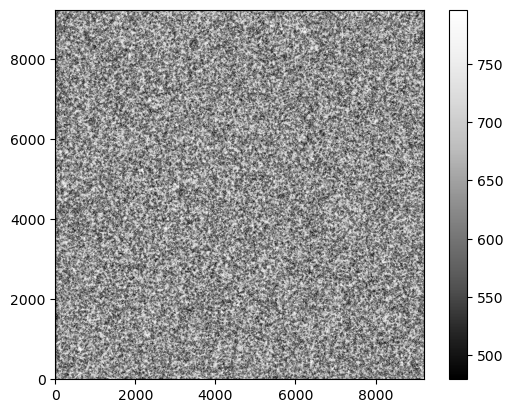

In [21]:
from photutils.segmentation import detect_sources
segmen = detect_sources(data, threshold=900, npixels=5)
mask = segmen.data > 0
bkg2 = Background2D(data, (5, 5), filter_size=(3, 3), mask=mask)
plt.imshow(bkg2.background, origin='lower', cmap='Greys_r', interpolation='nearest')
plt.colorbar()
# plt.show()

In [23]:
from astropy.stats import sigma_clipped_stats
image_data = fits.getdata(r'F:\data\image\CSST_MSC_MS_SCI_20210525120000_20210525120230_100000000_08_L0_1 2.fits')
mean, median, std = sigma_clipped_stats(image_data, sigma=3.0)
'Estimated noise level (standard deviation): {std}'

'Estimated noise level (standard deviation): {std}'

In [24]:
f'Estimated noise level (standard deviation): {std}'

'Estimated noise level (standard deviation): 304.9234707494846'

目标检测

[2310.18790468 2278.          333.49601343]
 id xcentroid ycentroid sharpness roundness1 ... sky    peak  flux  mag 
--- --------- --------- --------- ---------- ... ---- ------- ---- -----
  1  19066.11     95.51      0.48       0.05 ... 0.00 1077.00 1.43 -0.39
  2  19016.37    101.76      0.54      -0.30 ... 0.00  790.00 1.04 -0.04
  3  19080.41    220.74      0.49      -0.22 ... 0.00  848.00 1.05 -0.05
  4  19061.25    310.19      0.44      -0.77 ... 0.00  817.00 1.20 -0.19
  5  19060.48    455.63      0.50      -0.38 ... 0.00  785.00 1.21 -0.21
  6  19063.80    674.77      0.45      -0.95 ... 0.00  381.00 1.09 -0.10
  7  16521.98    677.97      0.45       0.12 ... 0.00 1156.00 1.04 -0.04
  8  14781.87   1307.12      0.42       0.33 ... 0.00 1799.00 1.02 -0.02
  9  17156.55   1313.55      0.51       0.62 ... 0.00 1505.00 1.00 -0.00
 10  17854.19   1362.99      0.36       0.10 ... 0.00 1966.00 1.09 -0.10
 11  18959.95   1539.08      0.46      -0.32 ... 0.00 1510.00 1.17 -0.17
 12  18

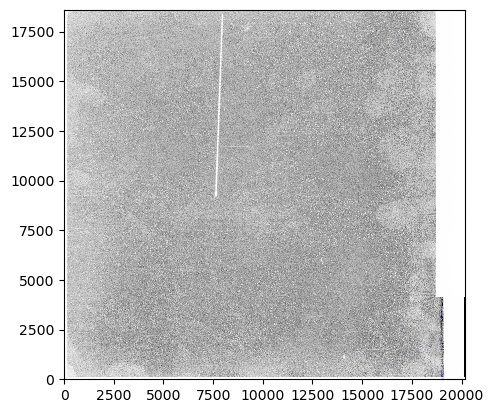

In [1]:
import numpy as np
from photutils.detection import DAOStarFinder
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
data = fits.getdata(r'F:\data\image\SH8902SHI61001.fits')
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
print(np.array((mean, median, std)))
daofind = DAOStarFinder(fwhm=3.0, threshold=5.0 * std)
sources = daofind(data - median)
for col in sources.colnames:
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'
sources.pprint(max_width=76)
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, origin='lower', cmap='Greys_r', norm=norm, interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

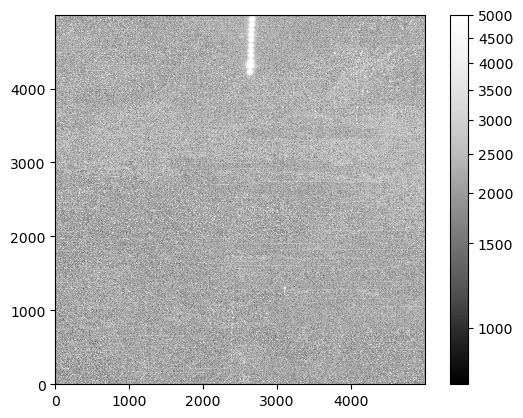

In [9]:
plt.imshow(data[5000:10000,5000:10000], origin='lower', cmap='Greys_r', norm=norm, interpolation='nearest')
apertures.plot(color='blue', lw=2, alpha=1)
plt.colorbar()

DS9使用截图

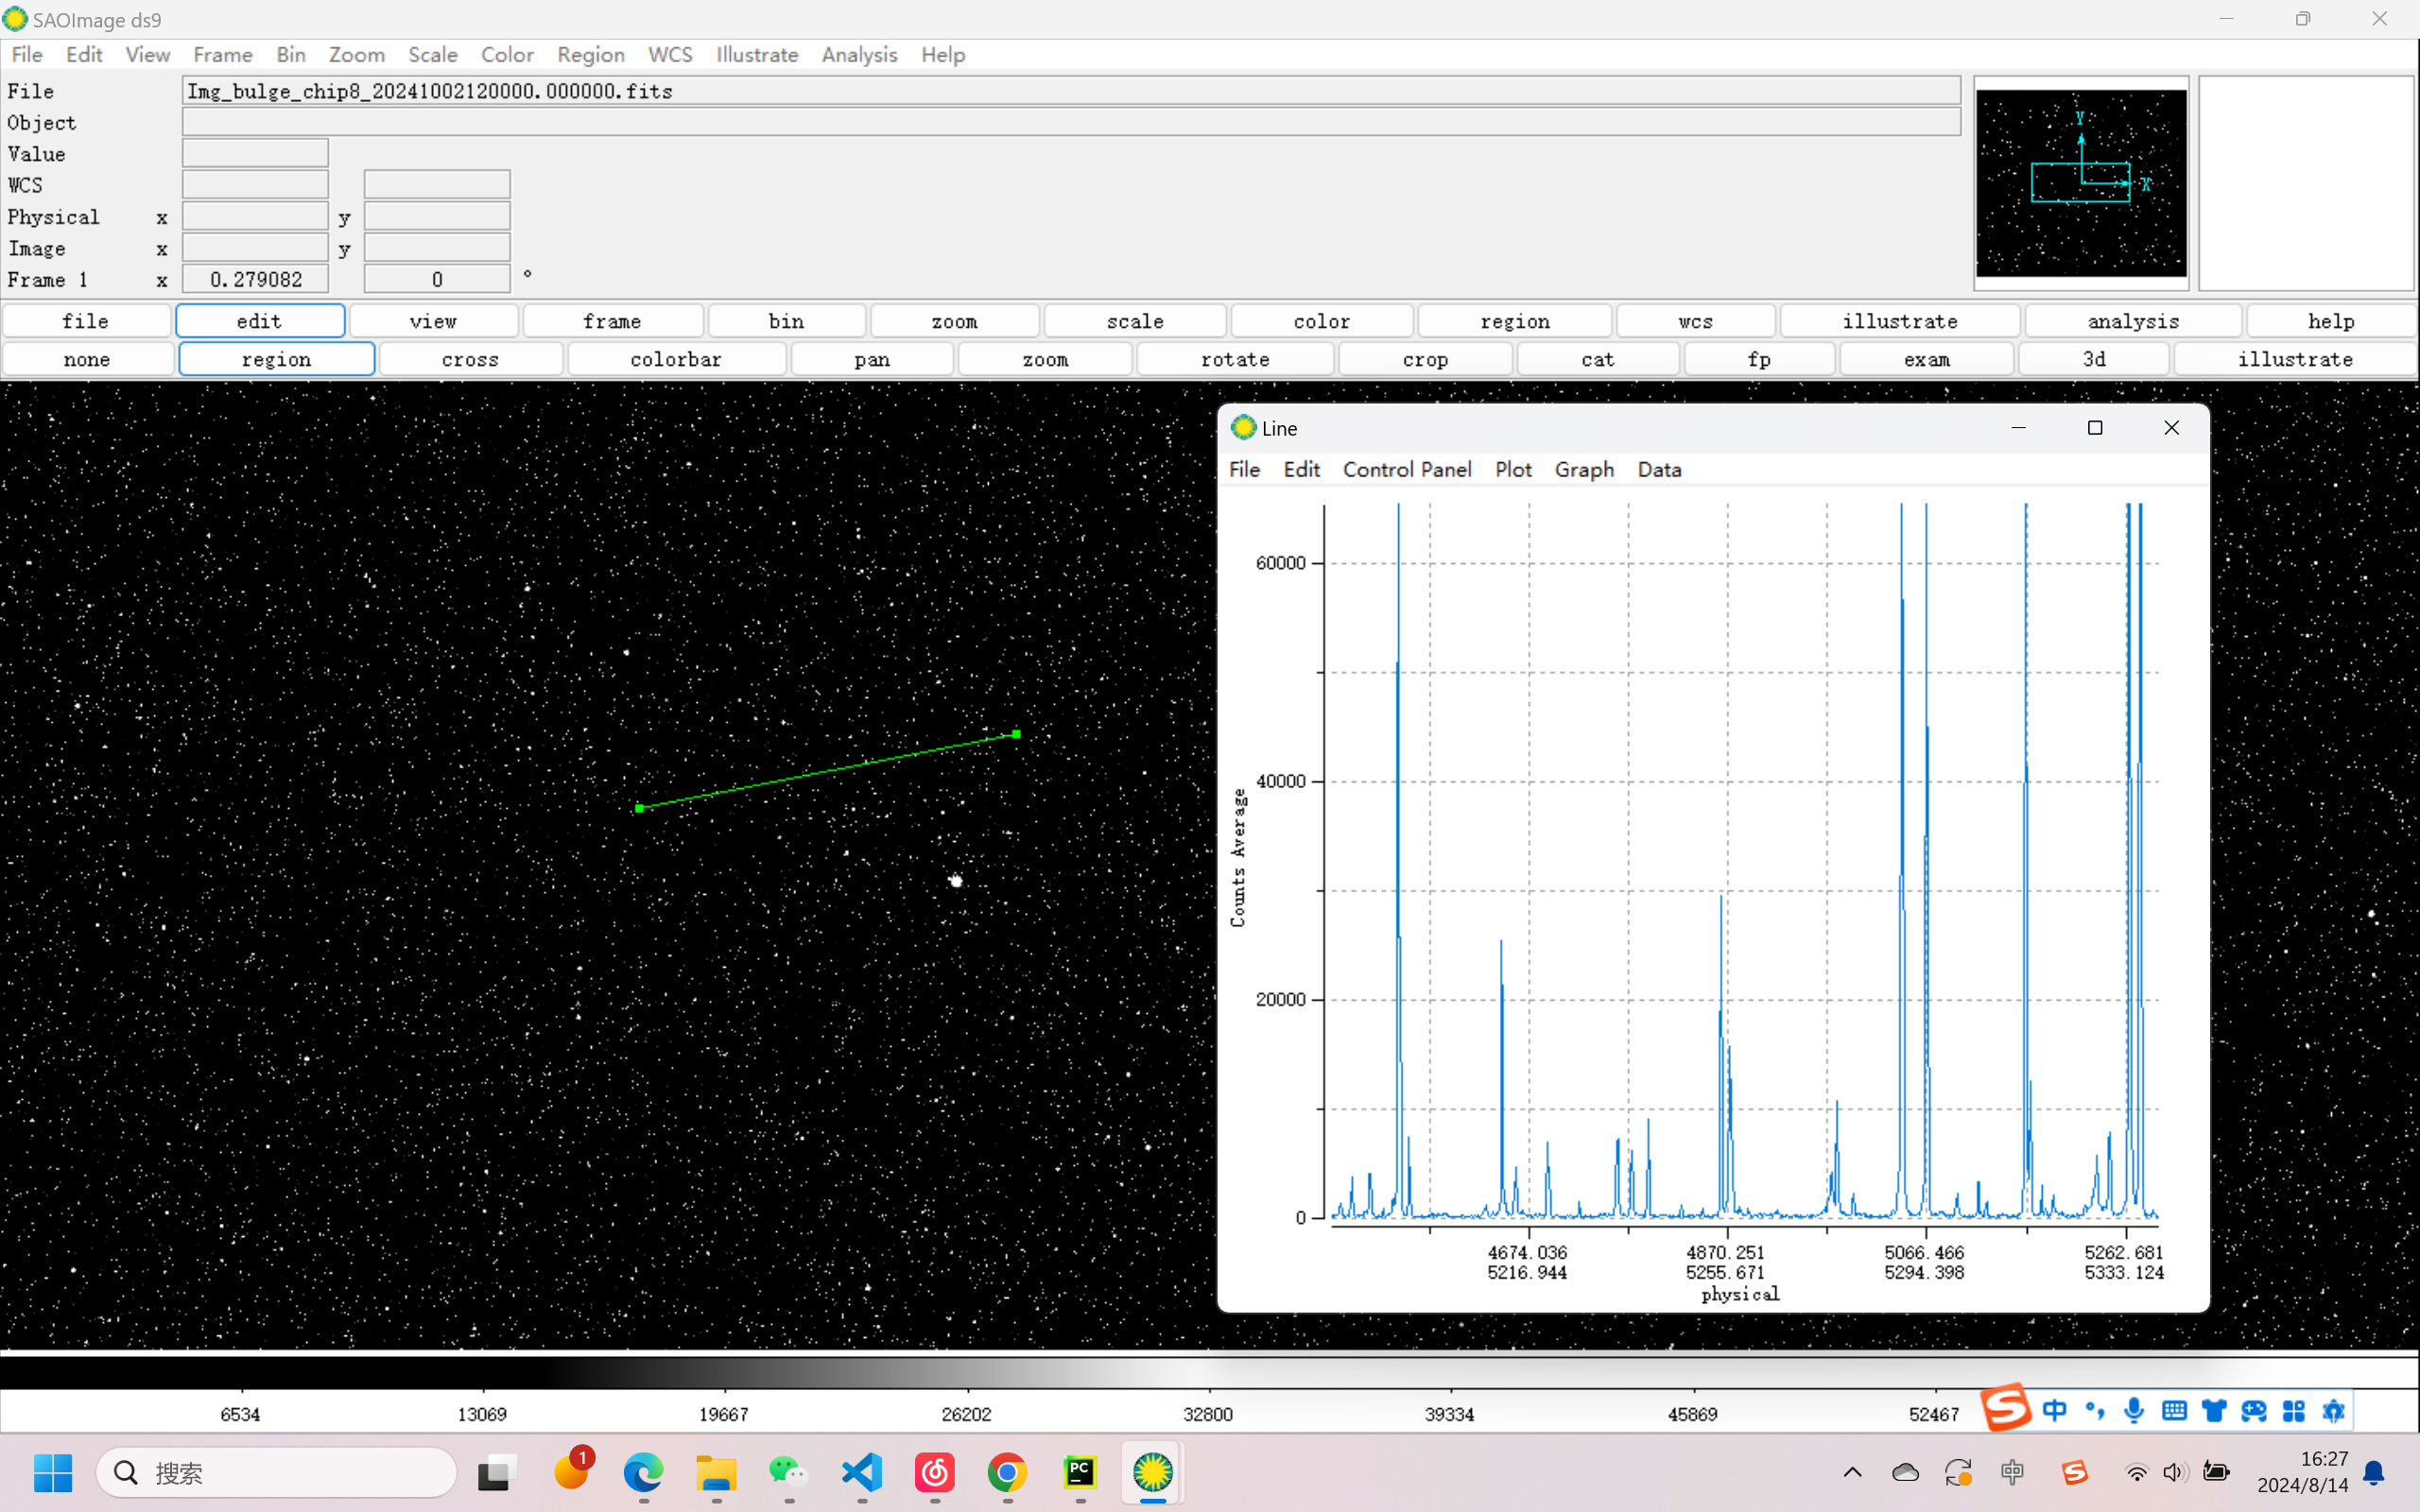

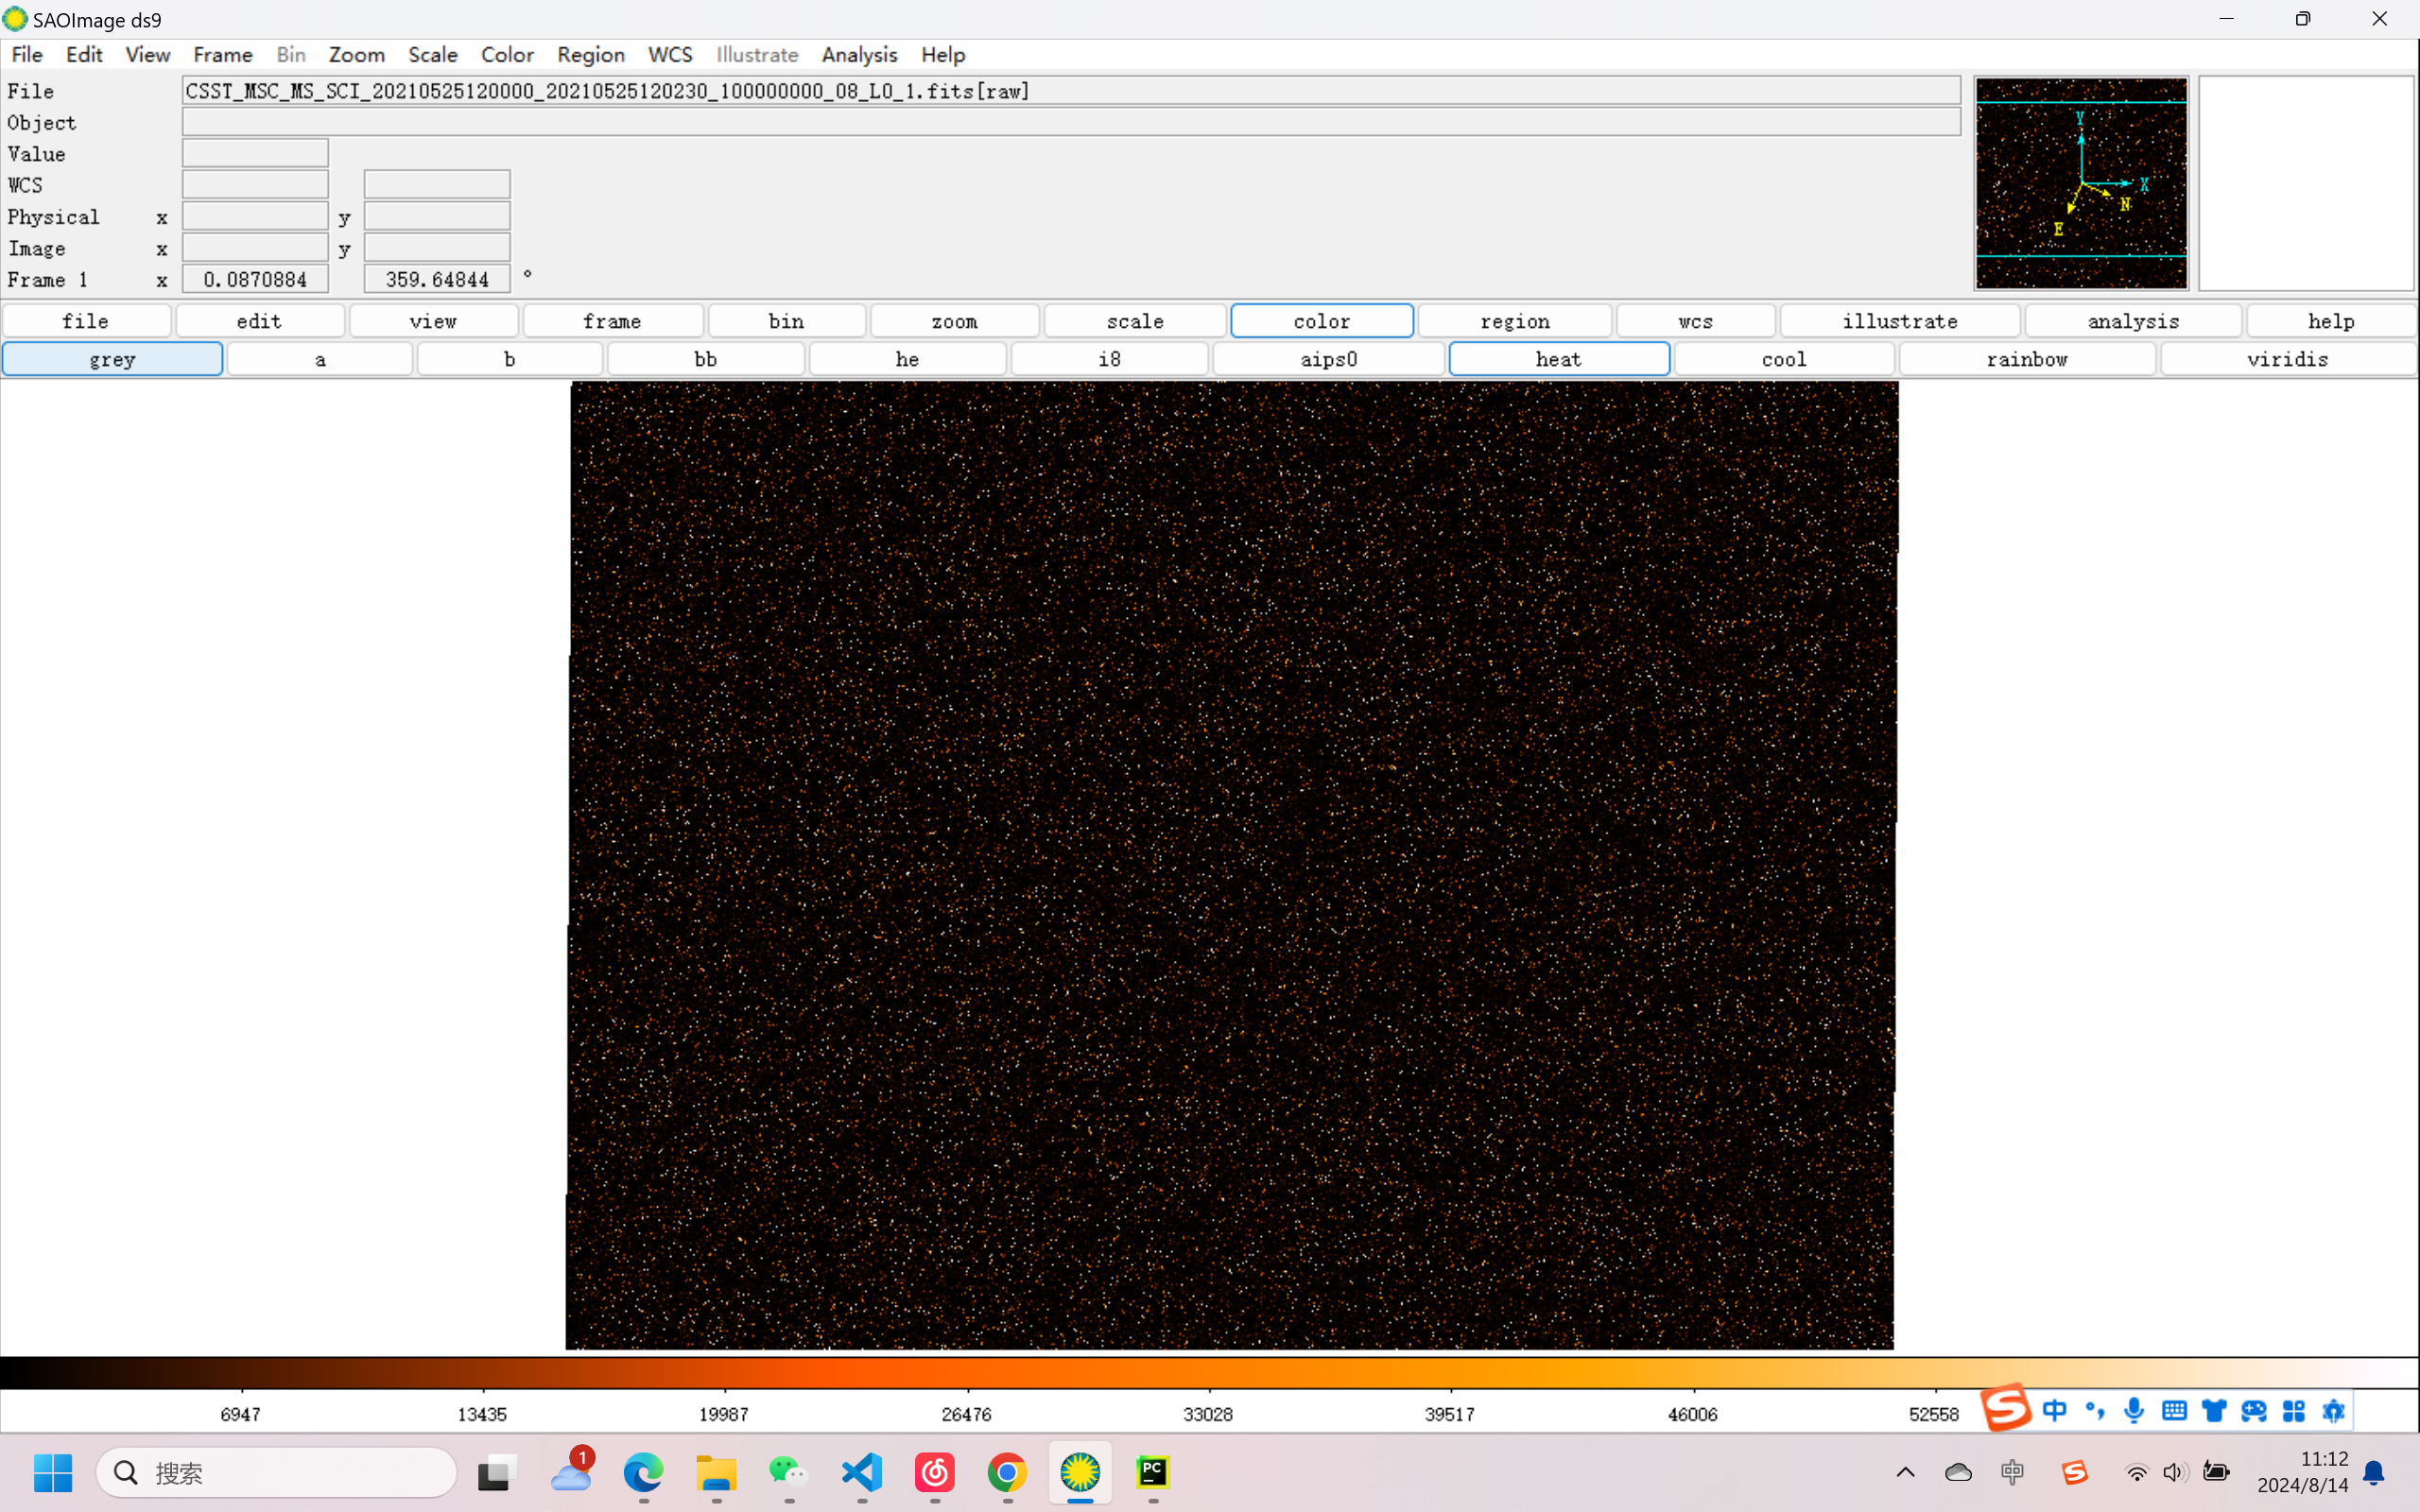

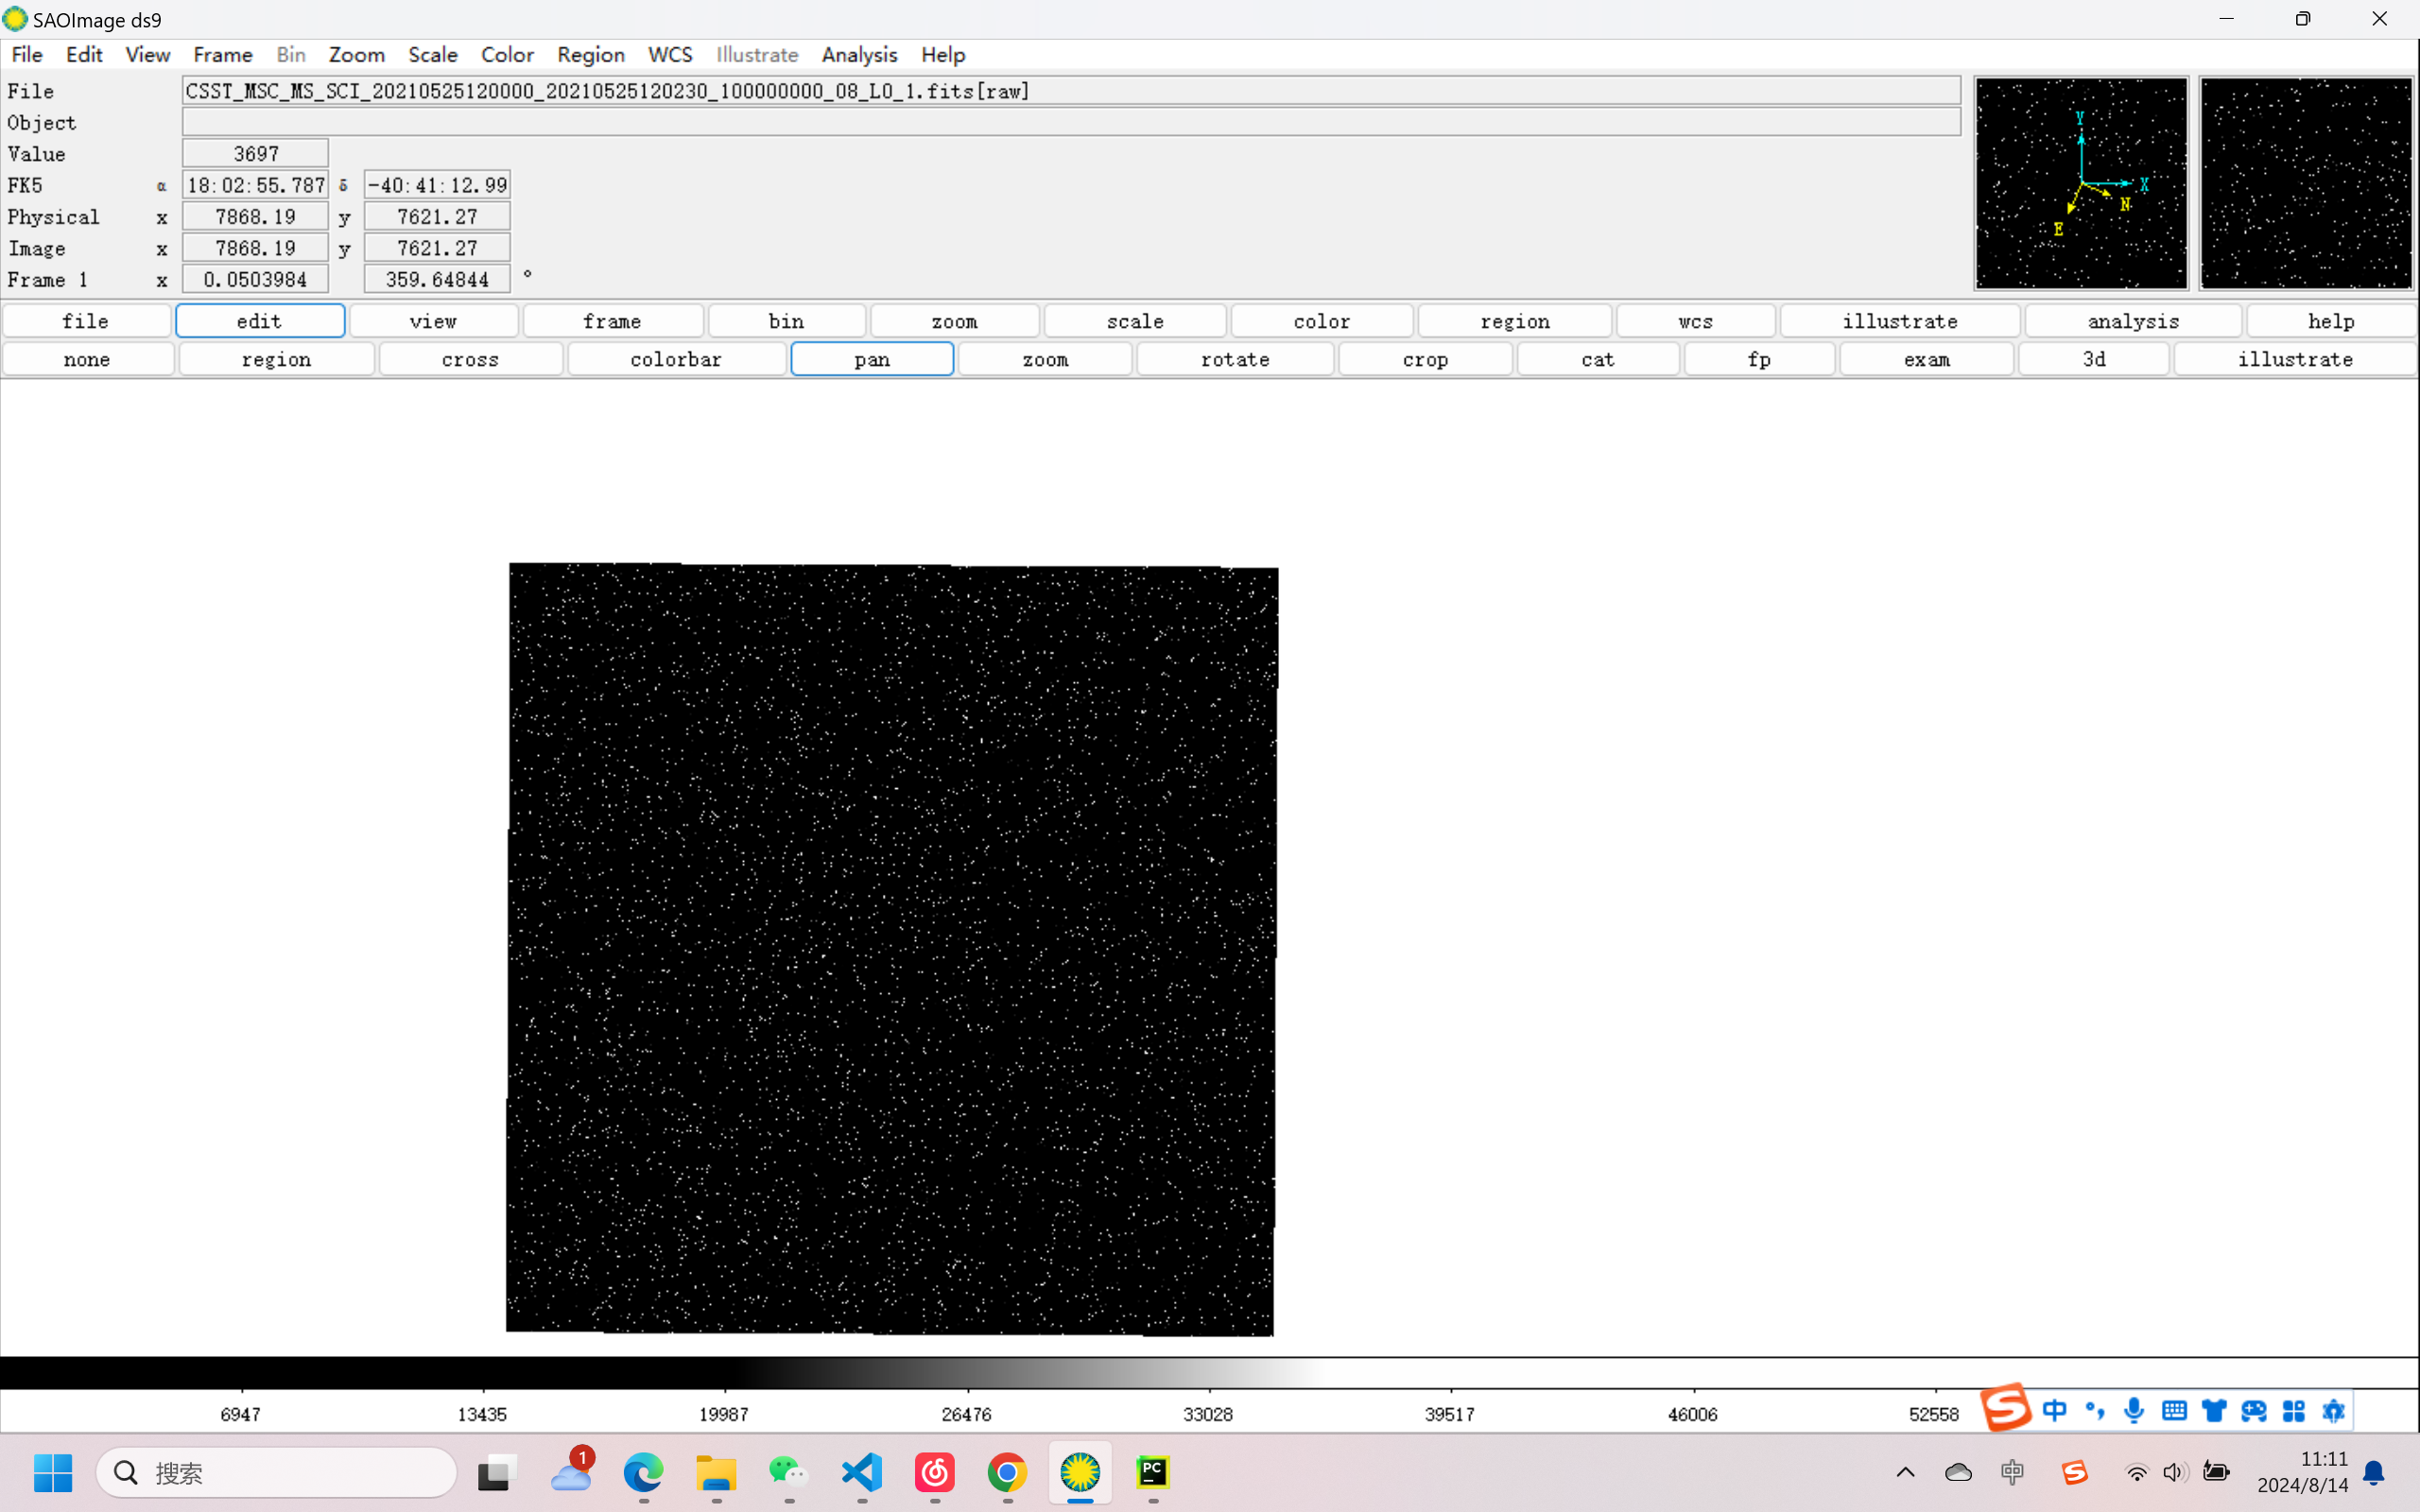

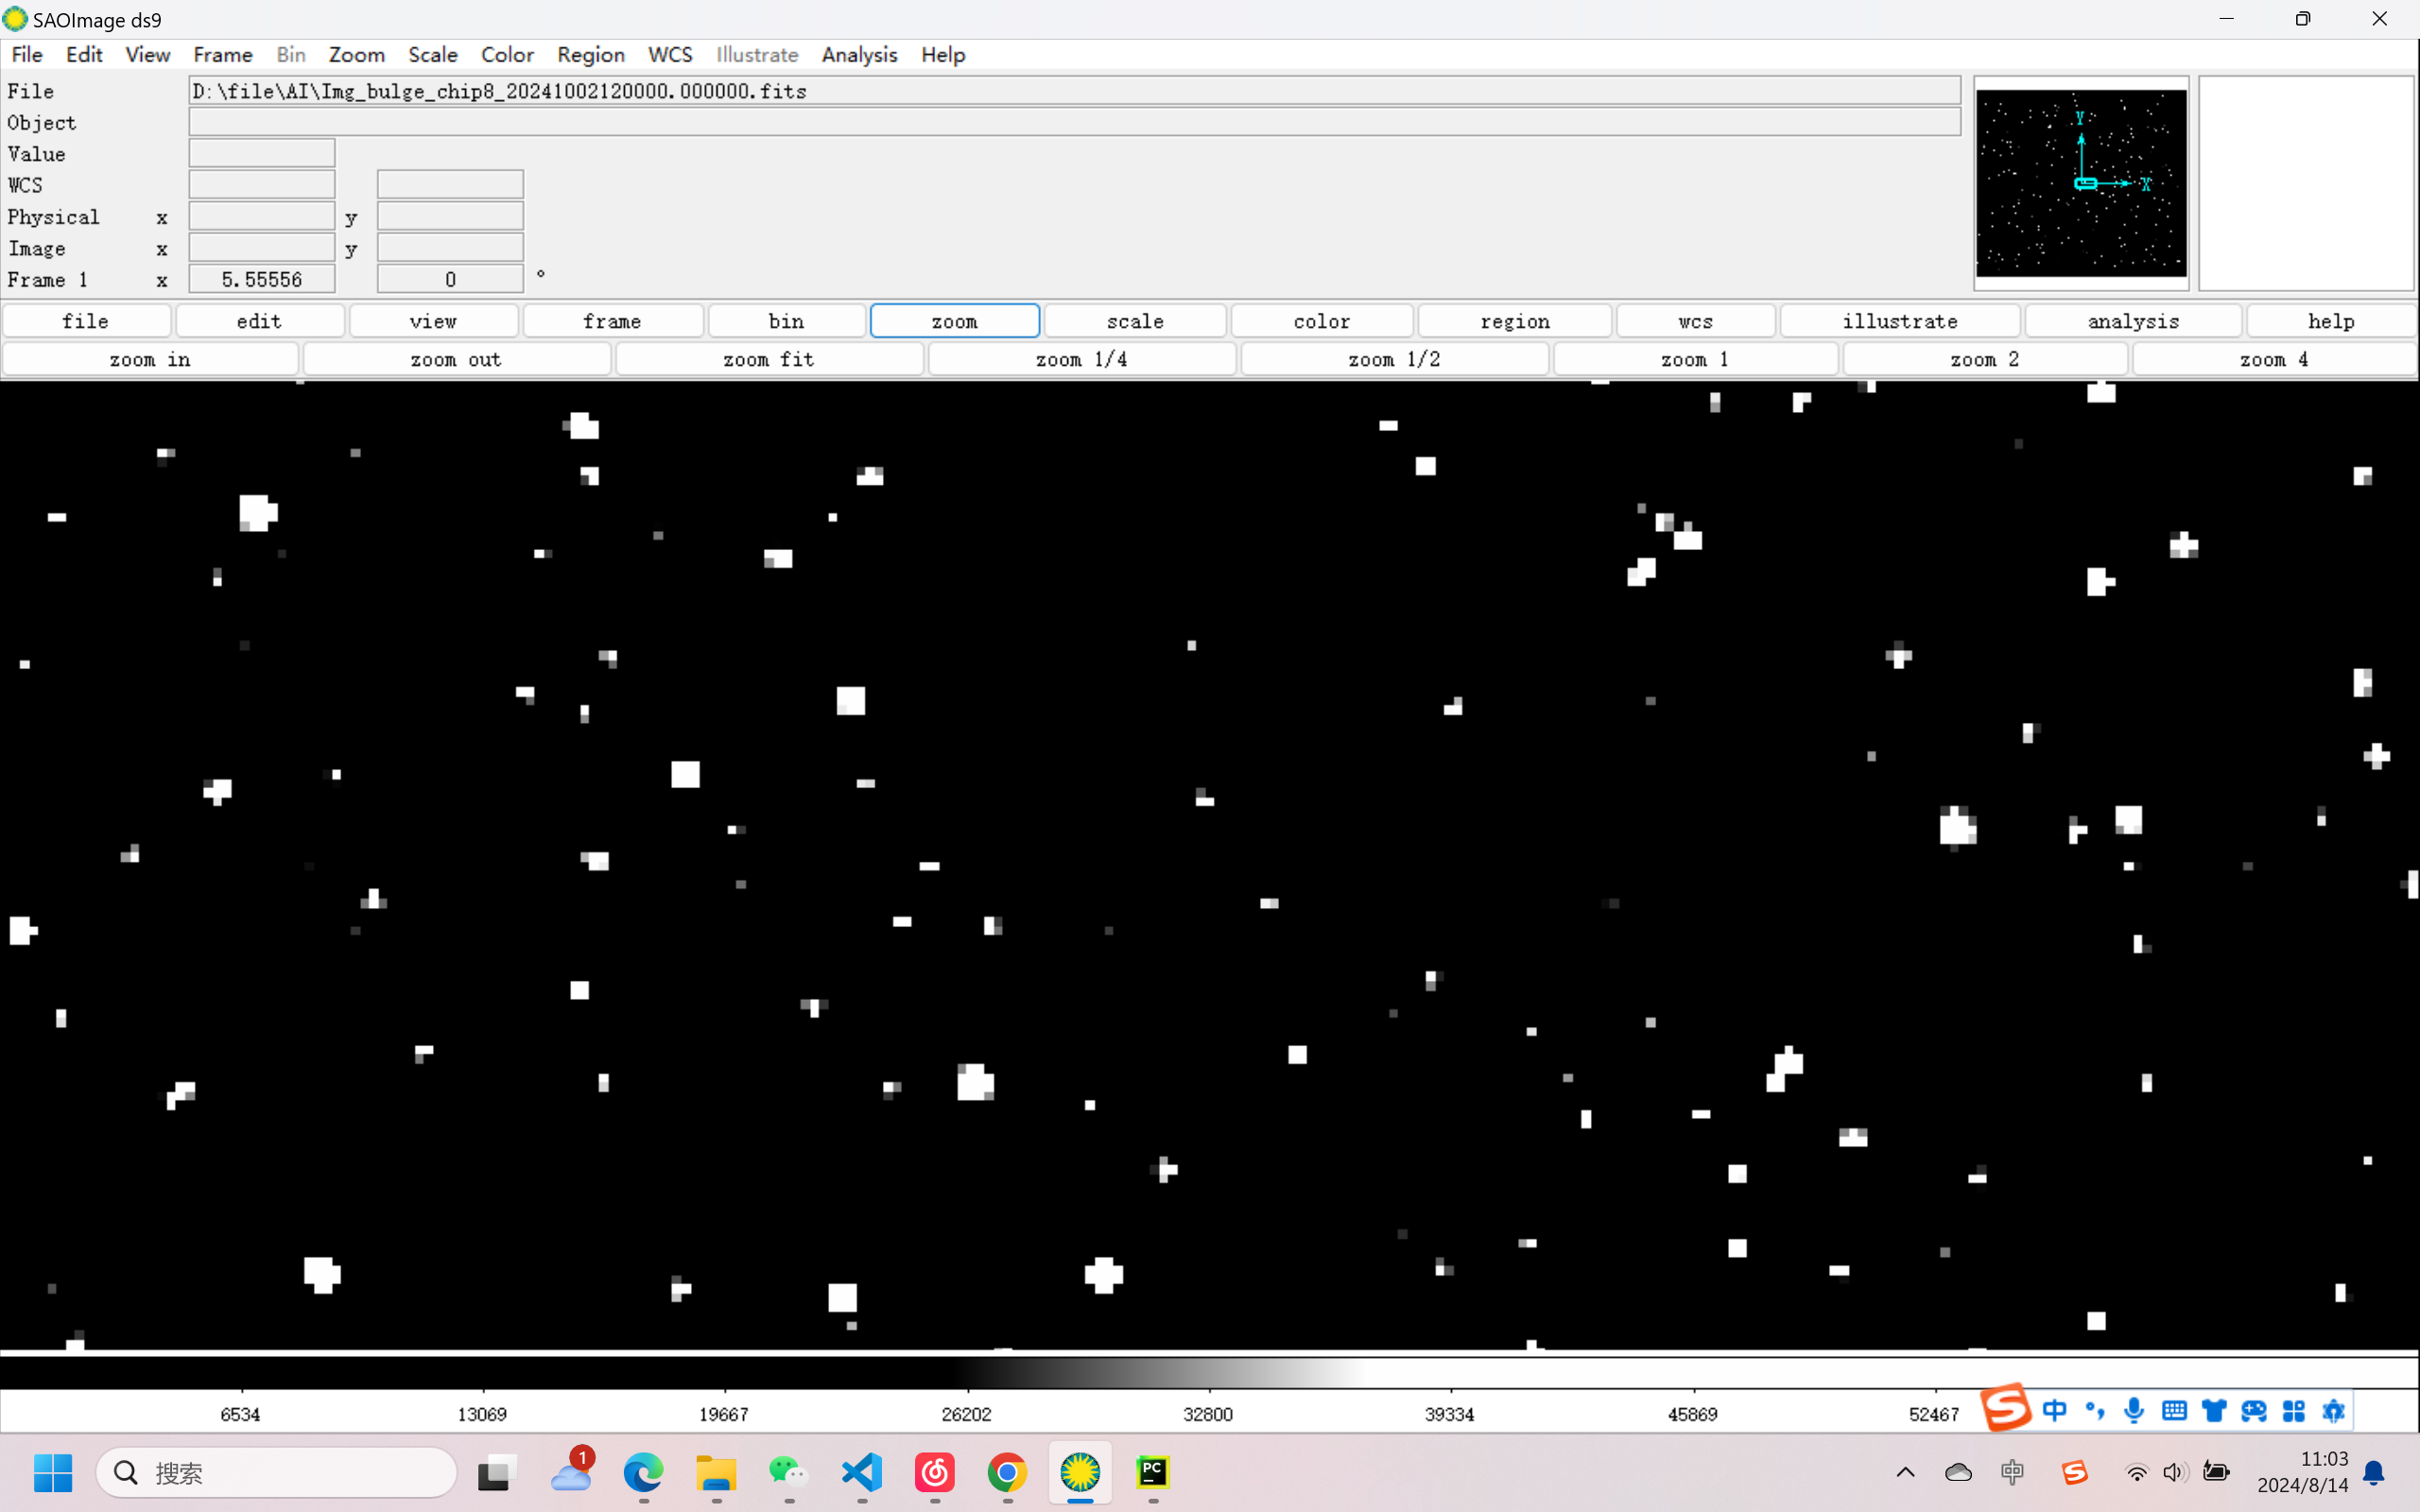

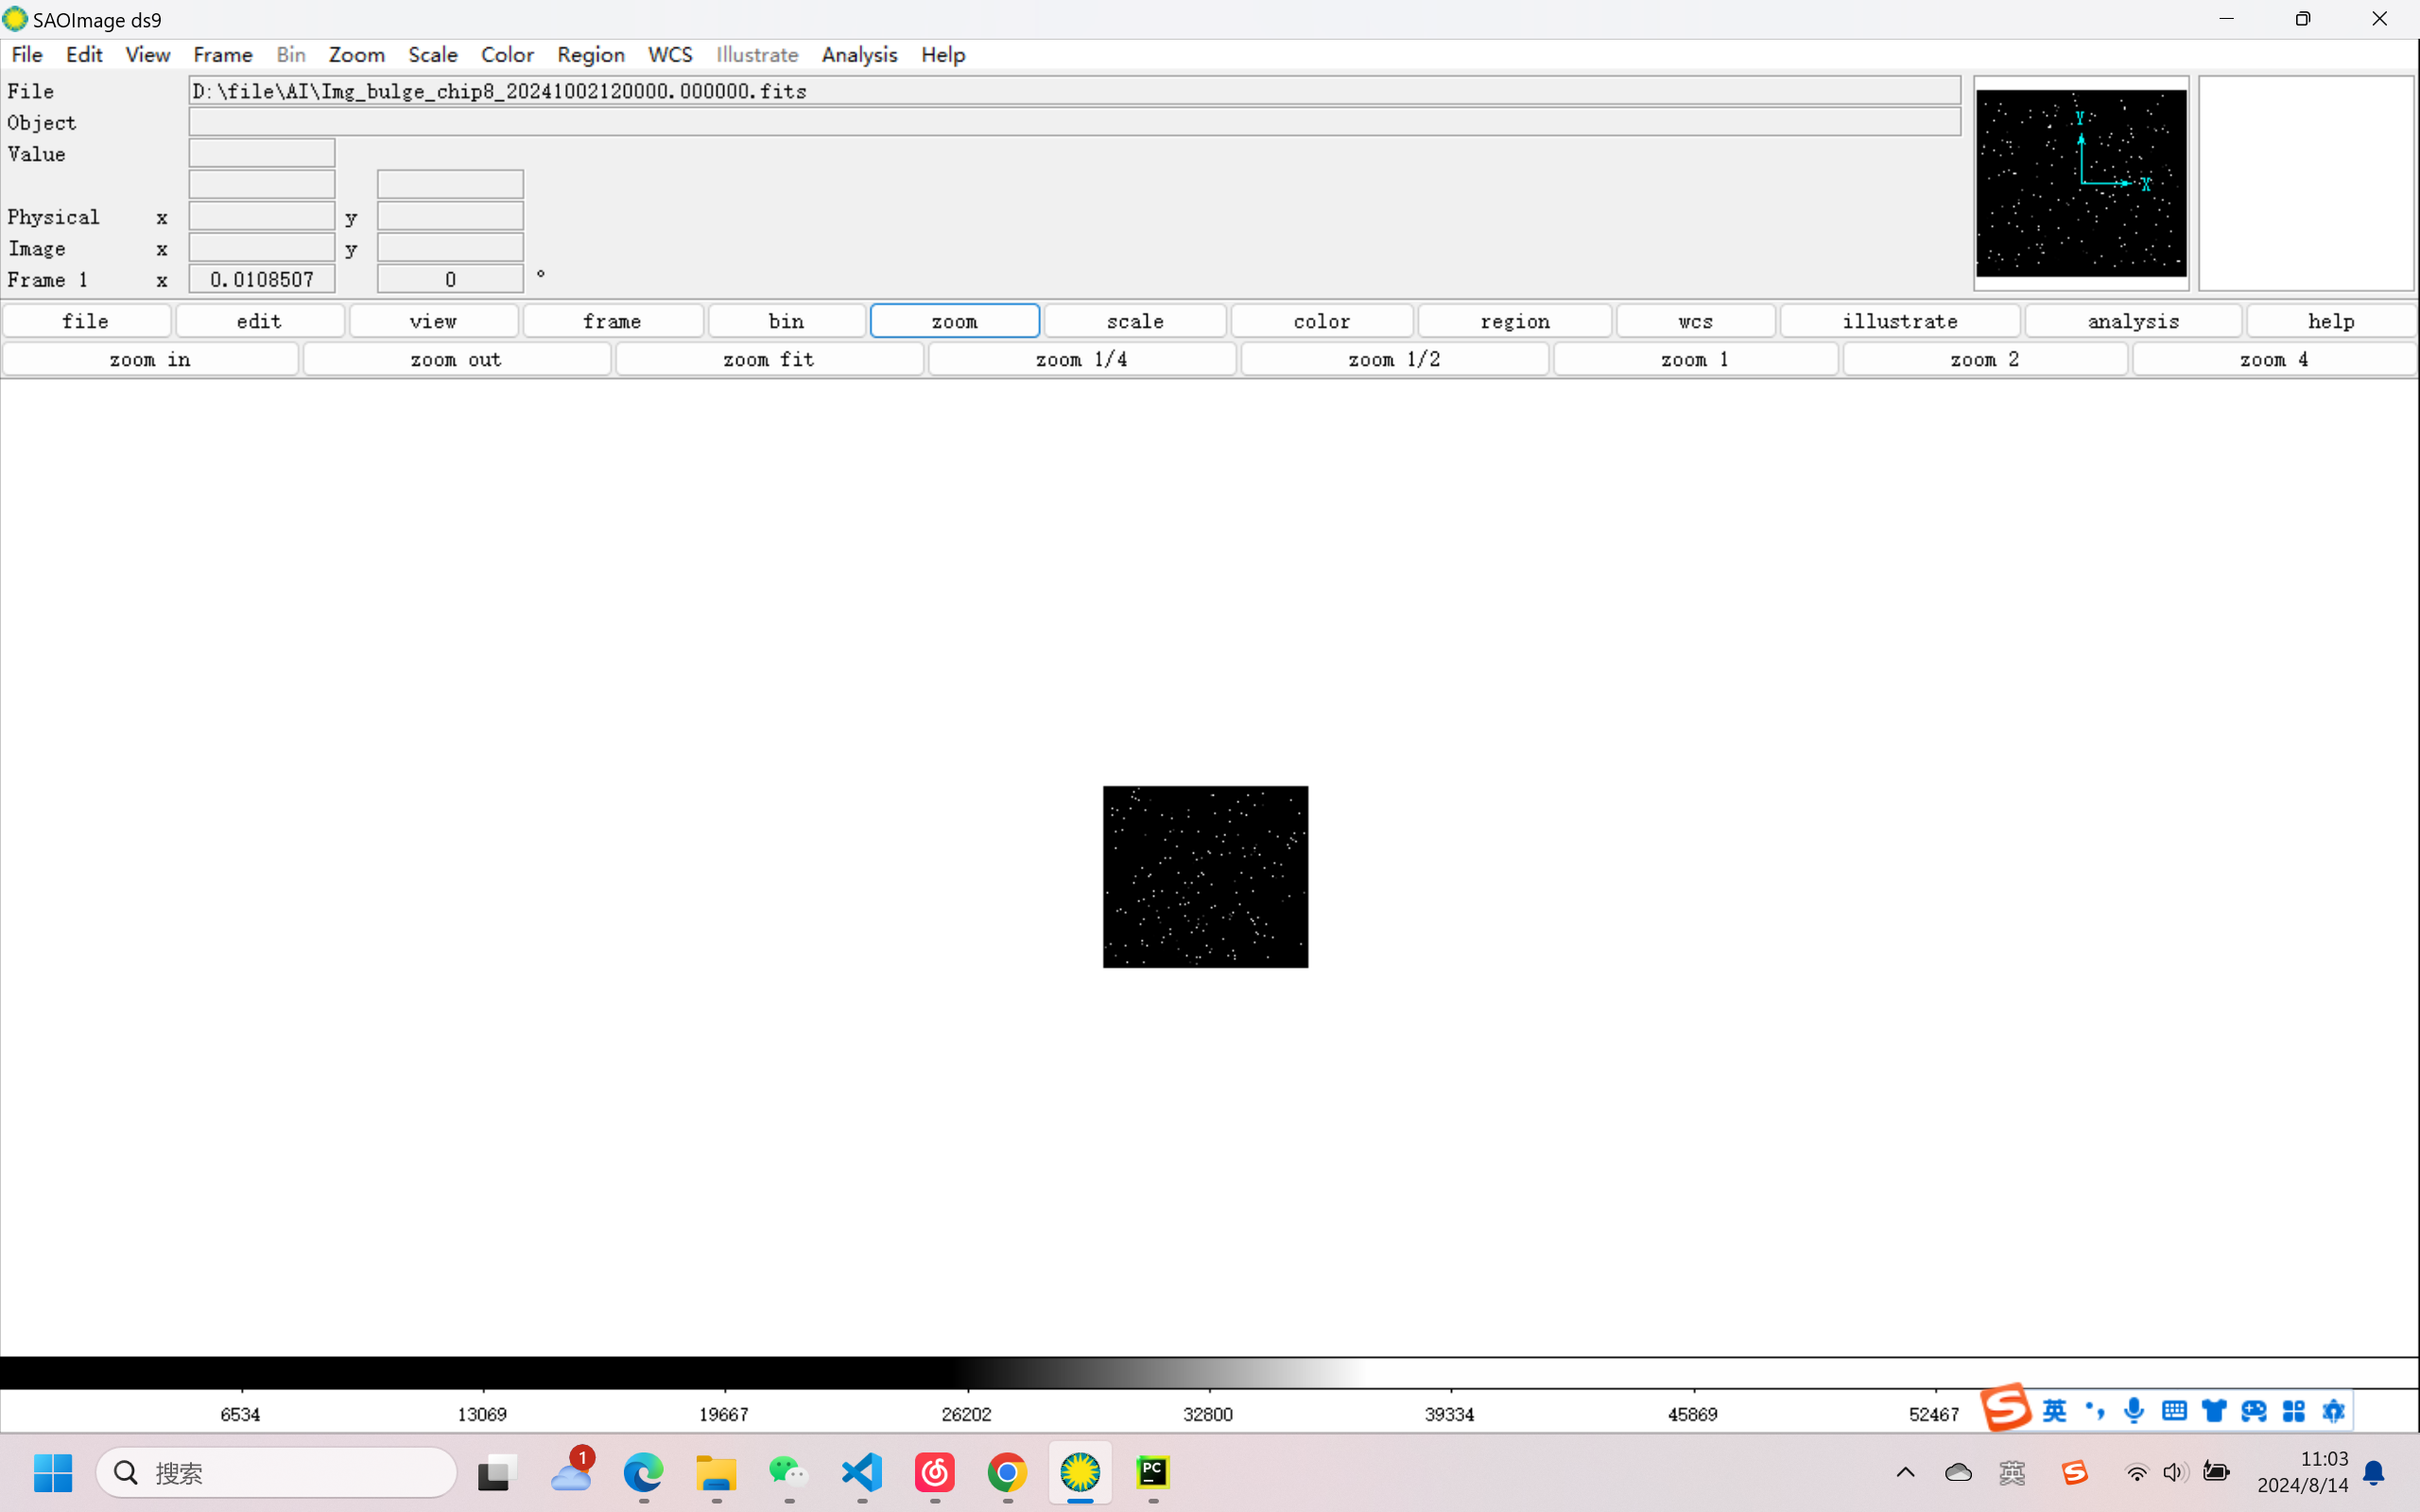

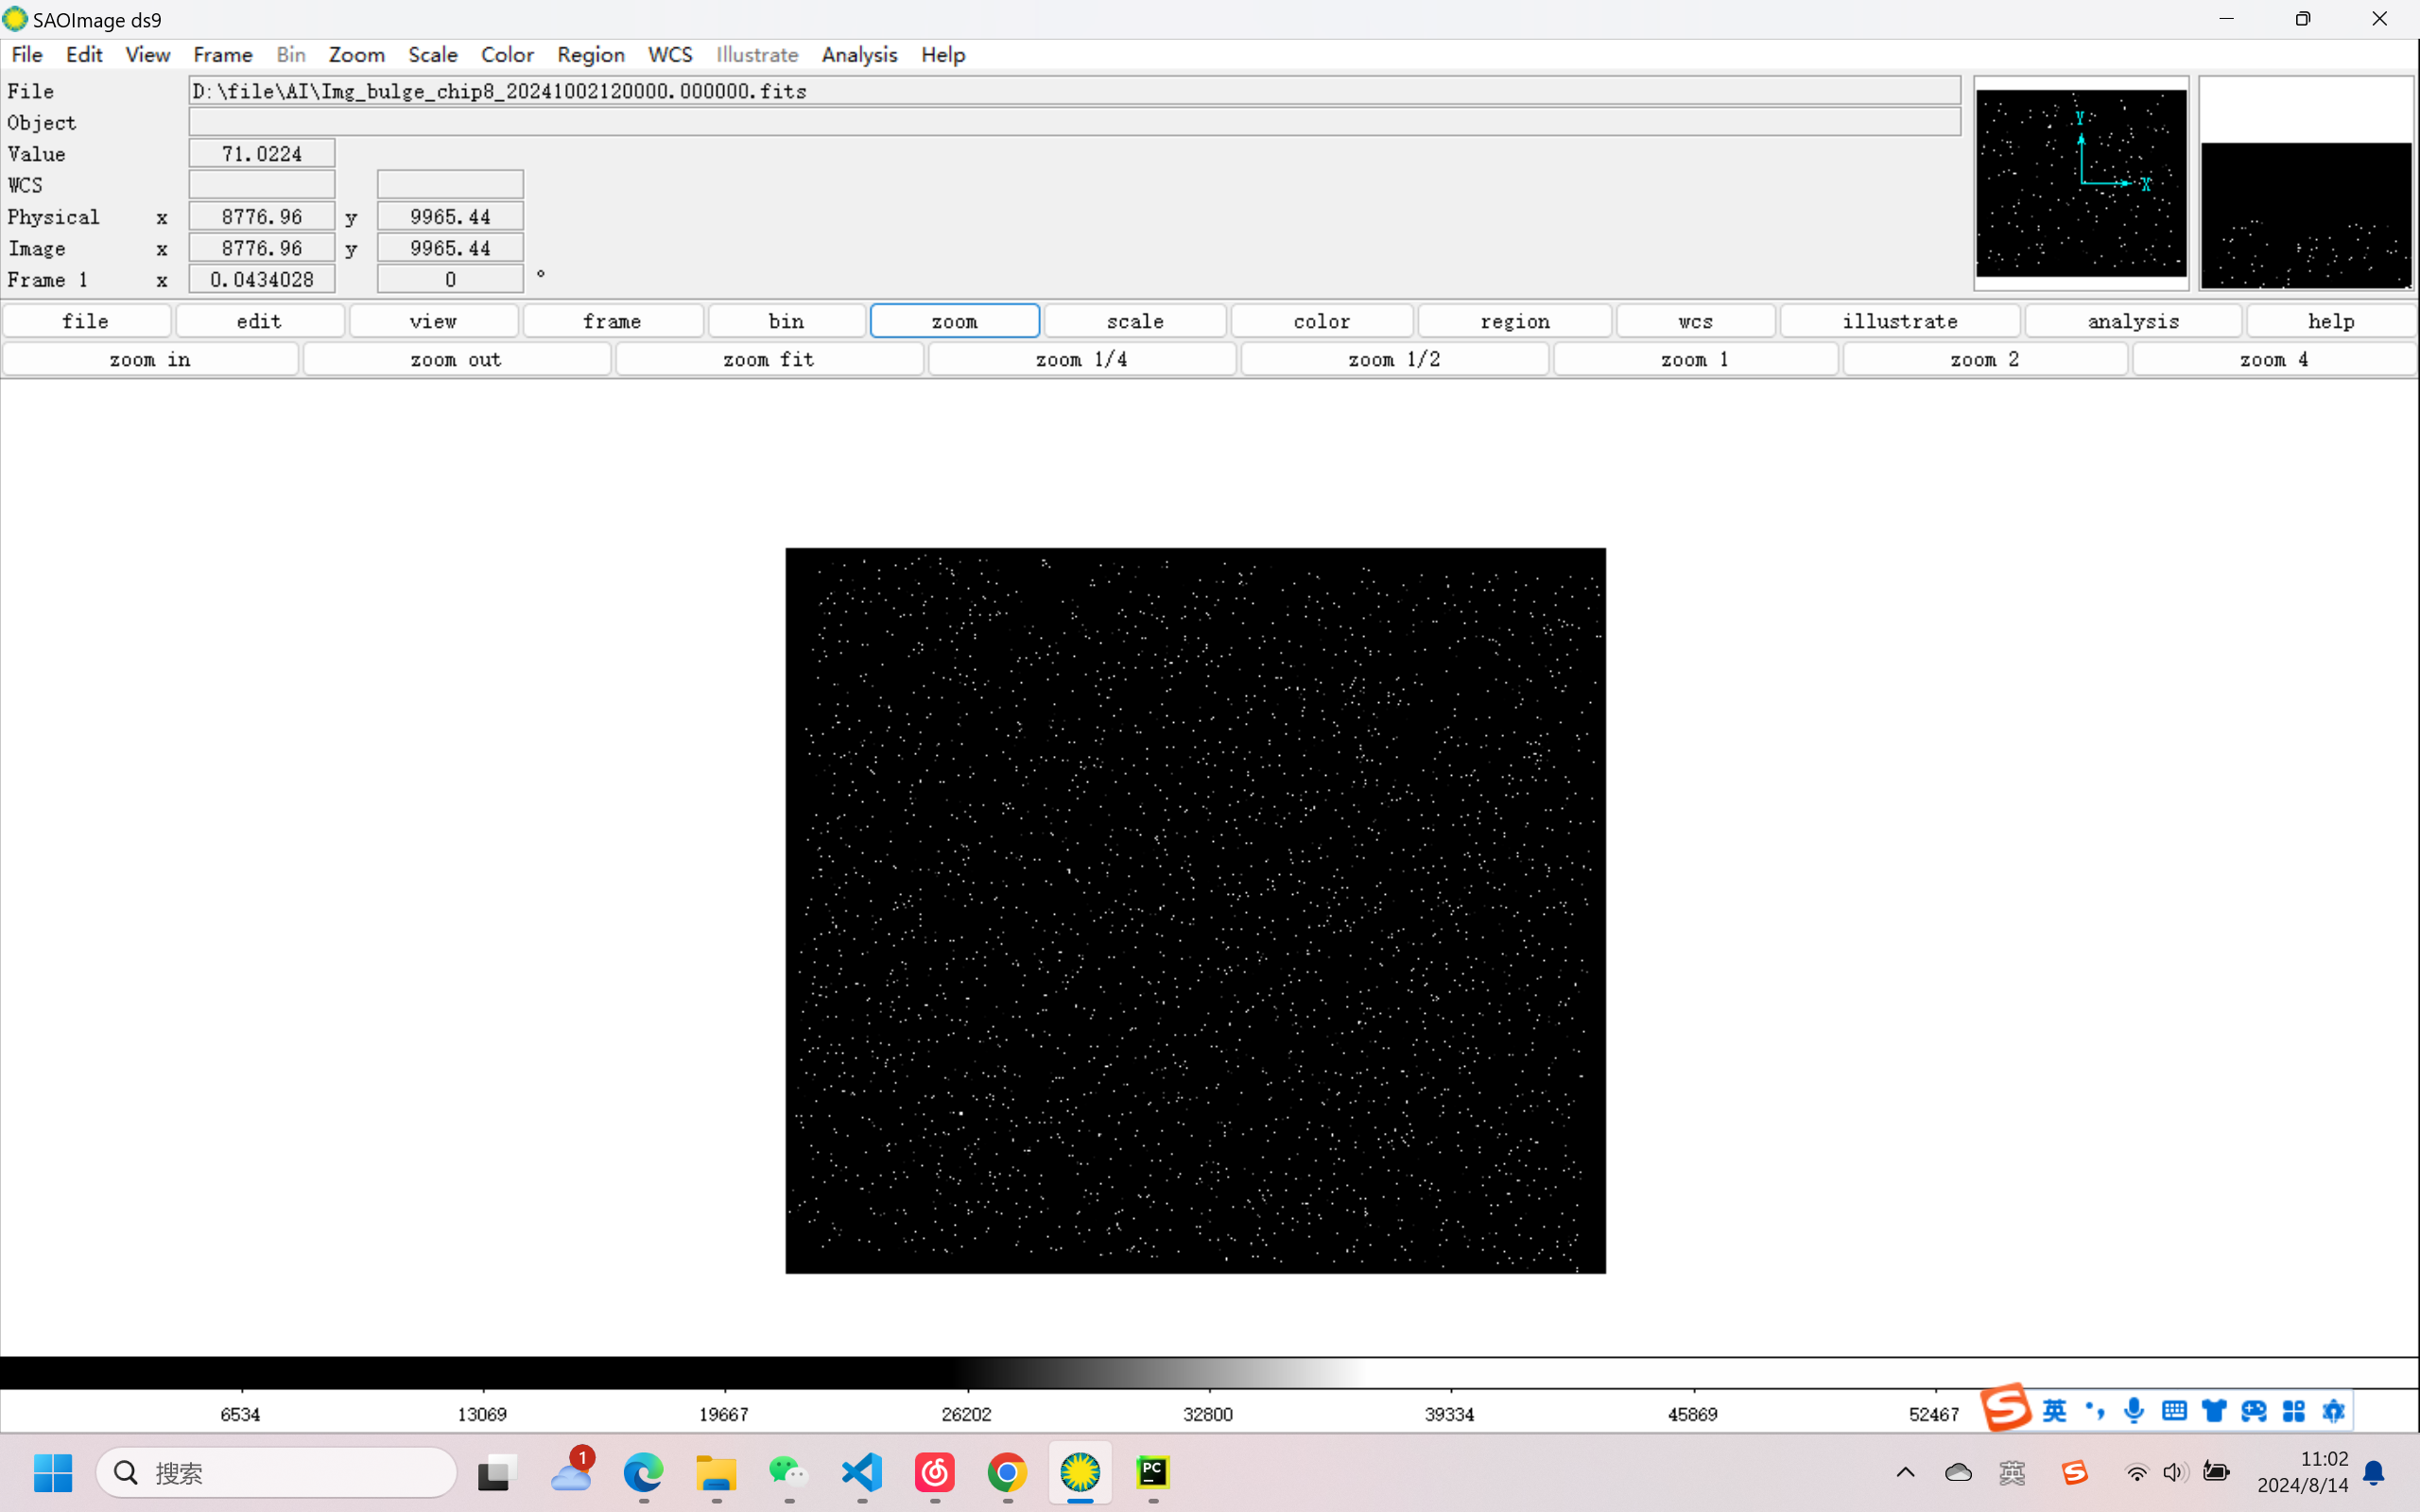

In [11]:
from IPython.display import Image, display
image_paths = [
   r"C:\Users\mapleLWG\Pictures\Screenshots\屏幕截图 2024-08-14 162750.png",
   r"C:\Users\mapleLWG\Pictures\Screenshots\屏幕截图 2024-08-14 111245.png",
   r"C:\Users\mapleLWG\Pictures\Screenshots\屏幕截图 2024-08-14 111104.png",
   r"C:\Users\mapleLWG\Pictures\Screenshots\屏幕截图 2024-08-14 110345.png",
   r"C:\Users\mapleLWG\Pictures\Screenshots\屏幕截图 2024-08-14 110327.png",
   r"C:\Users\mapleLWG\Pictures\Screenshots\屏幕截图 2024-08-14 110305.png"
]
for path in image_paths:
    display(Image(filename=path))

## 补充项目

astropy的Time类进行加减运算

In [2]:
from astropy.time import Time
from astropy import units as u
t1 = Time('2024-08-07T12:00:00')
t2 = Time('2024-08-08T12:00:00')
dt = 2 * u.hour
t3 = t1 + dt
t4 = t2 - t1
print(t3)
print(t4)

2024-08-07T14:00:00.000
1.0


定义一个coordinate的类、时间、自行，计算其十年之后的位置

In [4]:
from astropy.time import Time
from astropy import units as u
import numpy as np
class coordinates:
    def __init__(self, ra, dec, pm_ra, pm_dec, epoch):
        self.ra = ra
        self.dec = dec
        self.pm_ra = pm_ra / 3600.0
        self.pm_dec = pm_dec / 3600.0
        self.epoch = epoch
    def calculate(self, new_epoch):
        dt = new_epoch - self.epoch
        new_ra = self.ra + self.pm_ra * dt / np.cos(np.radians(self.dec))
        new_dec = self.dec + self.pm_dec * dt
        return new_ra % 360, new_dec
data1 = coordinates(ra=180.0, dec=45.0, pm_ra=10.0, pm_dec=5.0, epoch=2000.0)
data2 = data1.calculate(2010.0)
print(data2)
        

(180.03928371006592, 45.013888888888886)


### 或者使用astropy的自带方法

In [9]:
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import units as u

# 定义初始位置和自行
ra = 180.0 * u.deg
dec = 45.0 * u.deg
pm_ra_cosdec = 10.0 * 1000 * u.mas/u.yr  # 注意这里是 pm_ra_cosdec
pm_dec = 5.0 * 1000 * u.mas/u.yr
epoch = Time('J2000')

# 创建SkyCoord对象
star = SkyCoord(ra=ra, dec=dec, pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec, obstime=epoch)

# 计算10年后的位置
new_epoch = Time('J2010')
future_position = star.apply_space_motion(new_epoch)

print(f"初始位置: RA = {star.ra.deg:.4f}°, Dec = {star.dec.deg:.4f}°")
print(f"十年后的位置: RA = {future_position.ra.deg:.4f}°, Dec = {future_position.dec.deg:.4f}°")

初始位置: RA = 180.0000°, Dec = 45.0000°
十年后的位置: RA = 180.0393°, Dec = 45.0139°


## 评价

完成的非常好，不仅提前完成了当期的全部内容，而且将往期的内容也补充完毕。

有一些小的建议用以增强显示效果：

1. 对于9k*9k这么大的图，显示出来是看不到小的星象的。因此处理的时候无论大小都可以，显示的时候最好选100长宽左右的来检查处理效果。
2. 建议每张图旁边加上一个colorbar来表示图上的像素数值强度，以有一个理性的认知。

有一些小的建议用以更深入地理解处理方法：

1. 尝试在`sigma clip`和`mask`方法中调整不同参数，处理不同图像，体会其中的差别。
2. 学习官方文档。